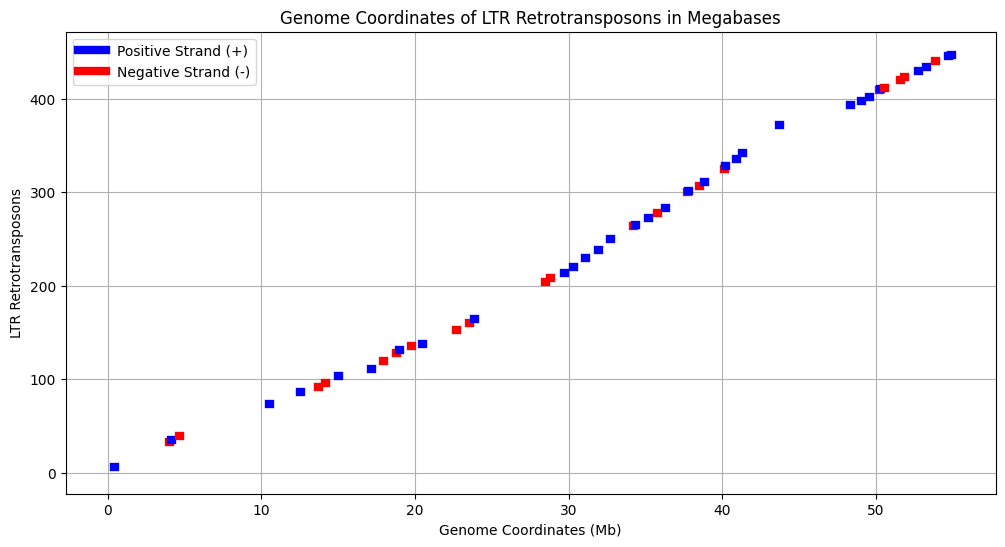

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the GFF file
gff_file = '/content/sequence_LTRpred.gff'  # Replace with your file path

# Define a list to hold the data
data = []

# Read the GFF file
with open(gff_file, 'r') as f:
    for line in f:
        if not line.startswith('#'):
            parts = line.strip().split('\t')
            if len(parts) > 8:
                seqname, source, feature, start, end, score, strand, phase, attributes = parts
                # Only consider features of interest, e.g., LTR_retrotransposon
                if feature == 'LTR_retrotransposon':
                    data.append({
                        'seqname': seqname,
                        'start': int(start),
                        'end': int(end),
                        'strand': strand
                    })

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert coordinates from base pairs to megabases
df['start_Mb'] = df['start'] / 1_000_000
df['end_Mb'] = df['end'] / 1_000_000

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot each feature
for index, row in df.iterrows():
    color = 'blue' if row['strand'] == '+' else 'red'
    plt.plot([row['start_Mb'], row['end_Mb']], [index, index], color=color, linewidth=6)

# Create the legend
handles = [
    plt.Line2D([0], [0], color='blue', lw=6, label='Positive Strand (+)'),
    plt.Line2D([0], [0], color='red', lw=6, label='Negative Strand (-)')
]
plt.legend(handles=handles)
# Set plot labels and title
plt.xlabel('Genome Coordinates (Mb)')
plt.ylabel('LTR Retrotransposons')
plt.title('Genome Coordinates of LTR Retrotransposons in Megabases')
plt.grid(True)

# Show the plot
plt.show()


In [3]:
import pandas as pd

# Load the data
file_path = '/content/GCF_000001735_LTRpred.bed'
data = pd.read_csv(file_path, sep='\t', header=None, names=['Chromosome', 'Start', 'End', 'Annotation'])

# Display the first few rows of the dataframe
print(data.head())



           Chromosome    Start      End                           Annotation
0  NC003070.9Arabidop   149500   155909   GCF_000001735_LTR_retrotransposon1
1  NC003070.9Arabidop  3357954  3363283   GCF_000001735_LTR_retrotransposon5
2  NC003070.9Arabidop  3780765  3785720   GCF_000001735_LTR_retrotransposon6
3  NC003070.9Arabidop  4081628  4091086   GCF_000001735_LTR_retrotransposon8
4  NC003070.9Arabidop  4405997  4411118  GCF_000001735_LTR_retrotransposon10


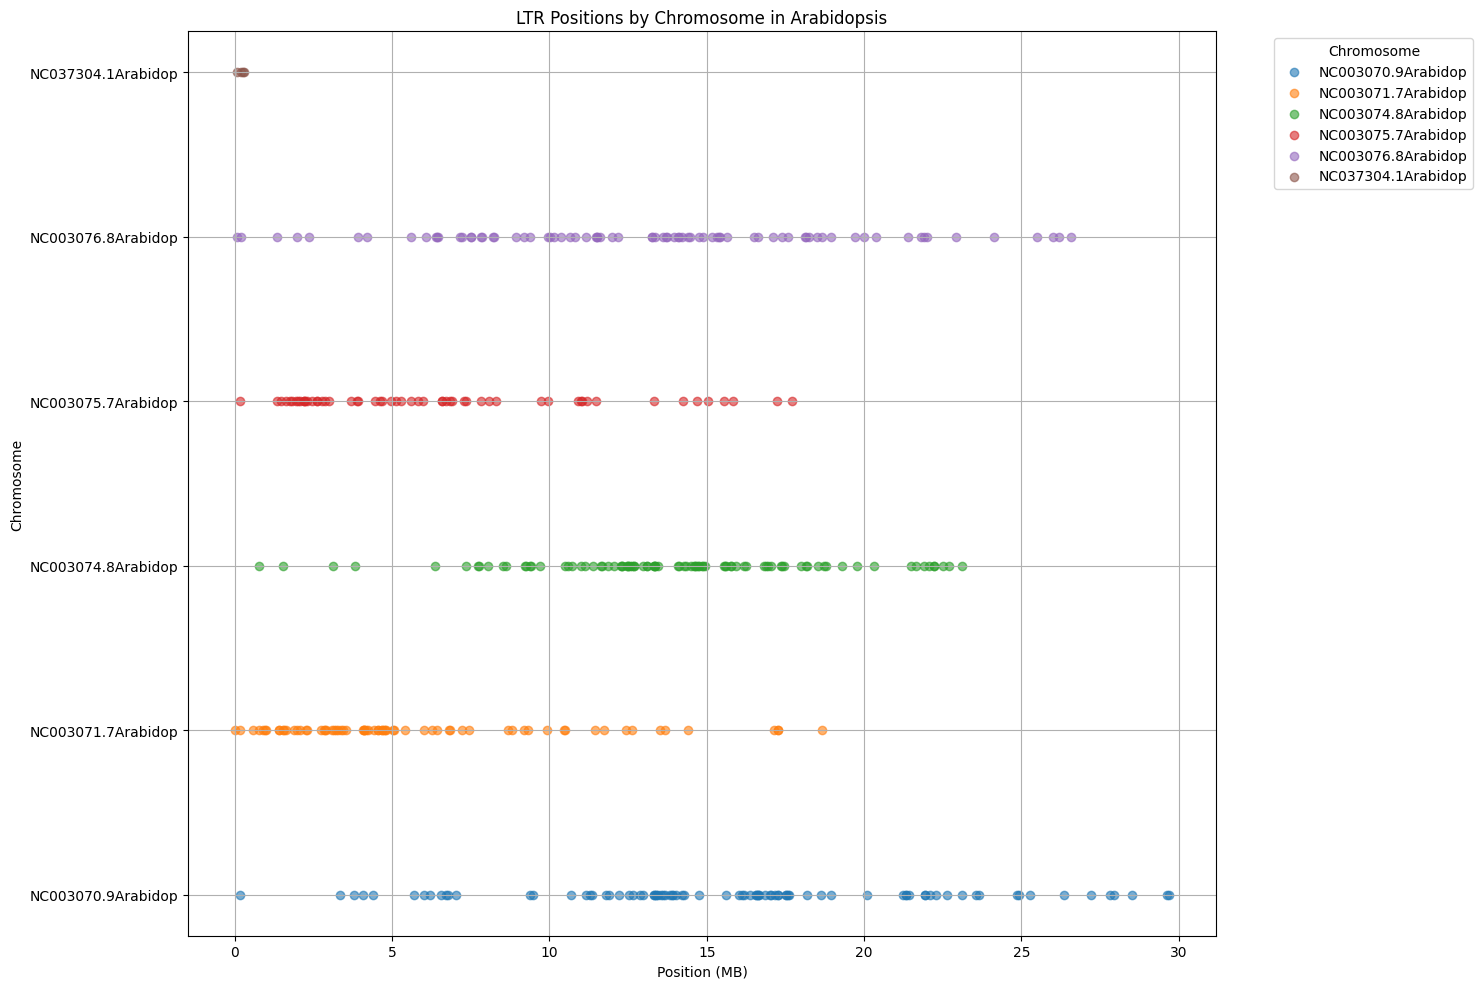

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the file
file_path = '/content/GCF_000001735_LTRpred.bed'

# Load the data
data = pd.read_csv(file_path, sep='\t', header=None, names=['Chromosome', 'Start', 'End', 'Annotation'])

# Convert start positions to megabases
data['Start_MB'] = data['Start'] / 1_000_000

# Extract unique chromosomes
chromosomes = data['Chromosome'].unique()

# Set up the plot
plt.figure(figsize=(15, 10))

# Plot the LTR positions for each chromosome
for chromosome in chromosomes:
    chrom_data = data[data['Chromosome'] == chromosome]
    plt.scatter(chrom_data['Start_MB'], [chromosome] * len(chrom_data), label=chromosome, alpha=0.6)

# Add titles and labels
plt.title('LTR Positions by Chromosome in Arabidopsis')
plt.xlabel('Position (MB)')
plt.ylabel('Chromosome')
plt.legend(title='Chromosome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


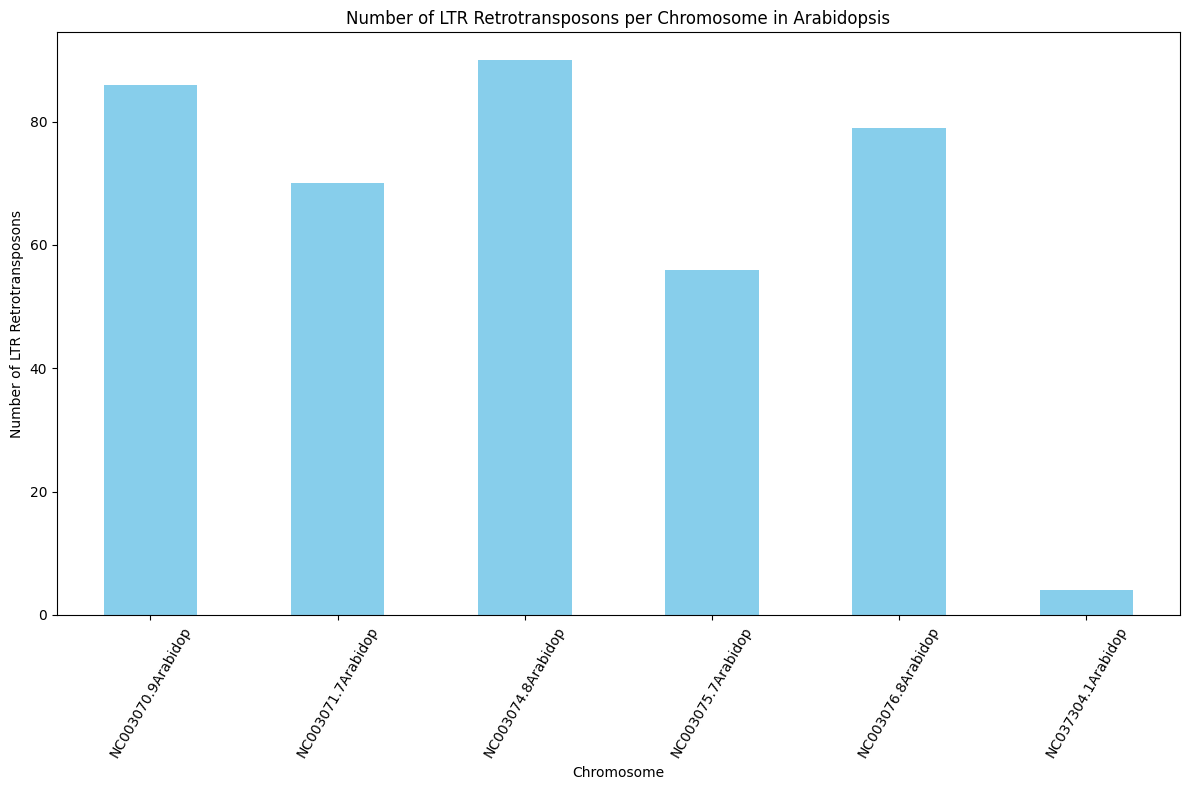

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the file
file_path = '/content/GCF_000001735_LTRpred.bed'

# Load the data
data = pd.read_csv(file_path, sep='\t', header=None, names=['Chromosome', 'Start', 'End', 'Annotation'])

# Count the number of LTR retrotransposons per chromosome
chromosome_counts = data['Chromosome'].value_counts().sort_index()

# Set up the bar plot
plt.figure(figsize=(12, 8))
chromosome_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of LTR Retrotransposons per Chromosome in Arabidopsis')
plt.xlabel('Chromosome')
plt.xticks(rotation=60)
plt.ylabel('Number of LTR Retrotransposons')

# Show the plot
plt.tight_layout()
plt.show()


In [34]:
te_file= "/content/arabidopsis_te_filtered.txt"

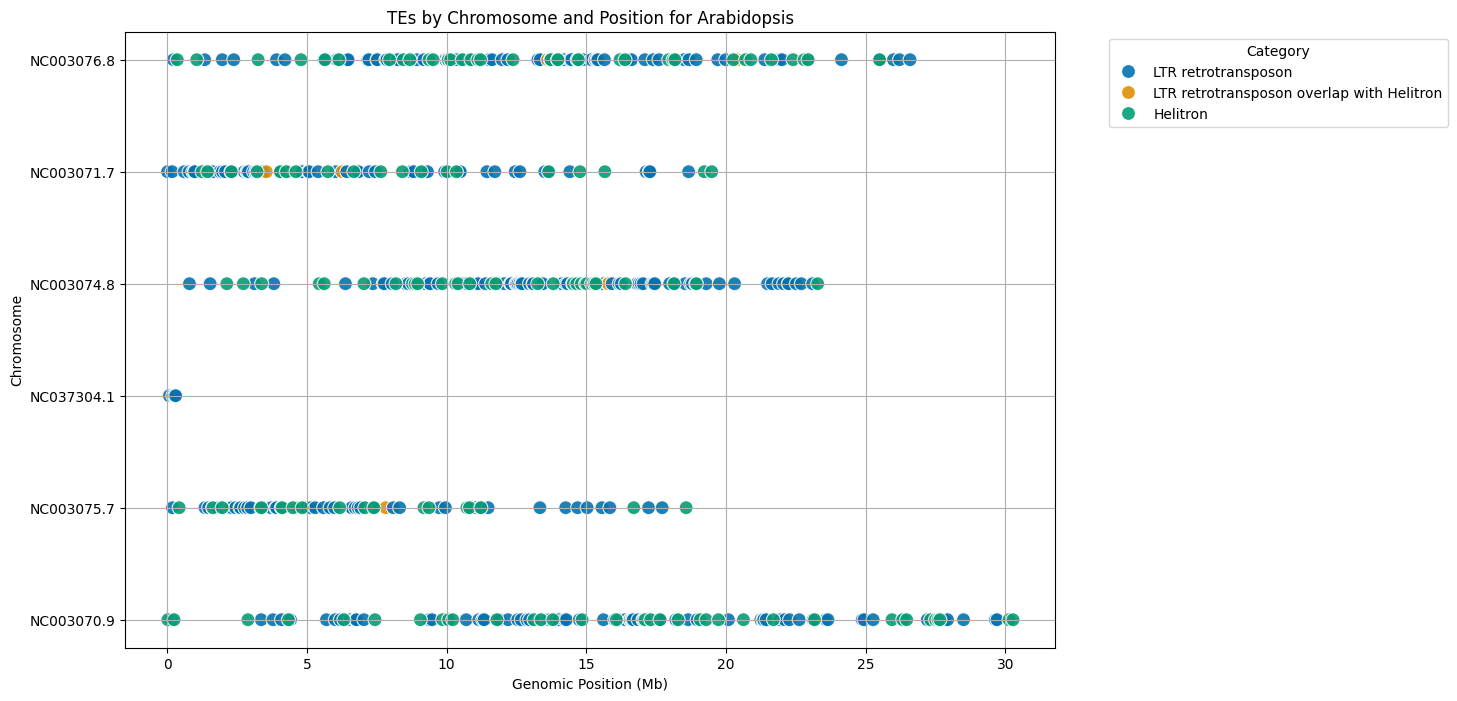

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the data with a custom function
def read_te_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        # Split by whitespace
        split_line = line.strip().split(maxsplit=3)
        if len(split_line) == 4:
            data.append(split_line)

    # Convert to DataFrame
    df = pd.DataFrame(data[1:], columns=['Chromosome', 'Start', 'End', 'Annotation'])

    # Convert Start and End to integers
    df['Start'] = df['Start'].astype(int)
    df['End'] = df['End'].astype(int)

    return df

# Read the file
file_path = '/content/arabidopsis_te_filtered.txt'
df = read_te_file(file_path)

# Step 2: Categorize annotations
def categorize_annotation(annotation):
    if 'overlap' in annotation:
        return 'LTR retrotransposon overlap with Helitron'
    elif 'Helitron' in annotation:
        return 'Helitron'
    else:
        return 'LTR retrotransposon'

df['Category'] = df['Annotation'].apply(categorize_annotation)

# Step 3: Prepare the Data
df['Mid_Position'] = (df['Start'] + df['End']) / 2 / 1e6  # Convert positions to megabases
chromosomes = df['Chromosome']
mid_positions = df['Mid_Position']
categories = df['Category']

# Step 4: Plot the Data
plt.figure(figsize=(12, 8))
sns.scatterplot(x=mid_positions, y=chromosomes, hue=categories, palette='colorblind', s=100, edgecolor="w", alpha=0.9)
plt.xlabel('Genomic Position (Mb)')
plt.ylabel('Chromosome')
plt.title('TEs by Chromosome and Position for Arabidopsis')
plt.grid(True)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


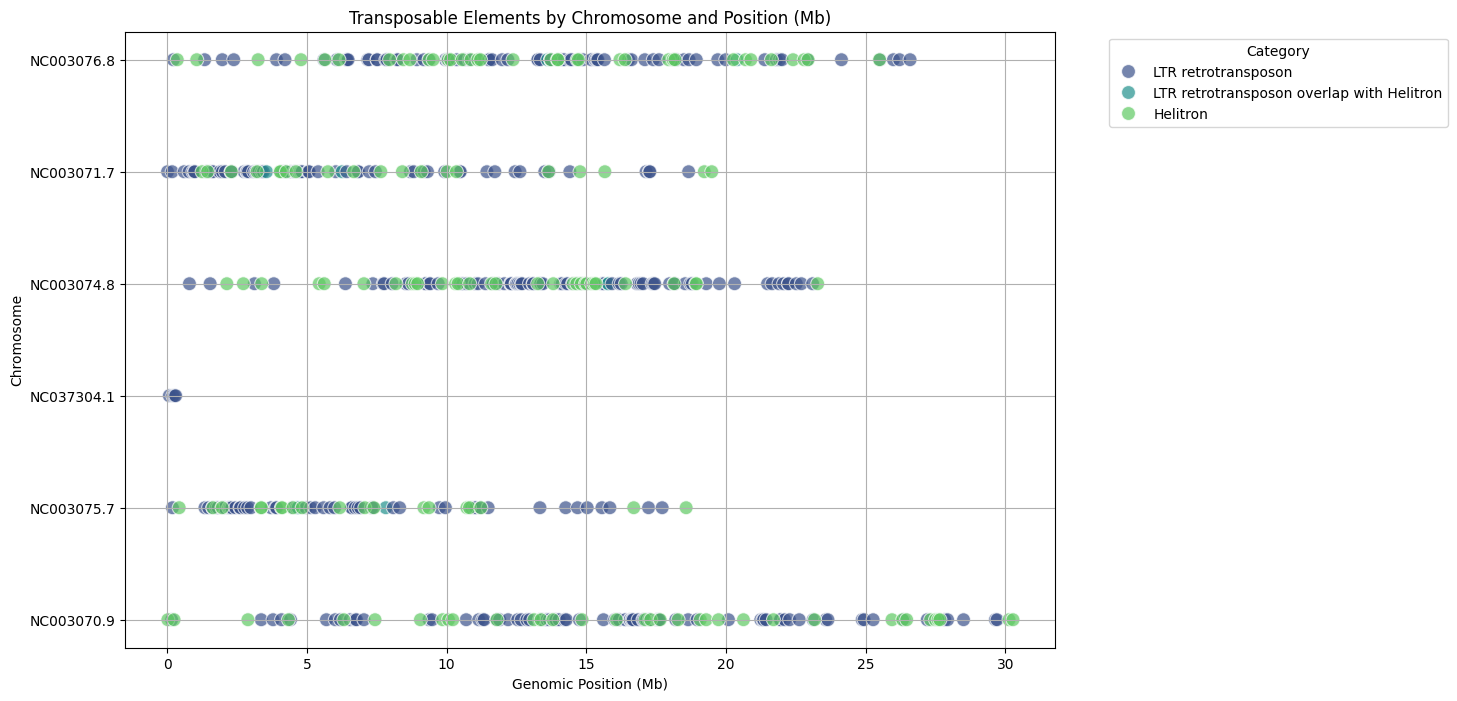

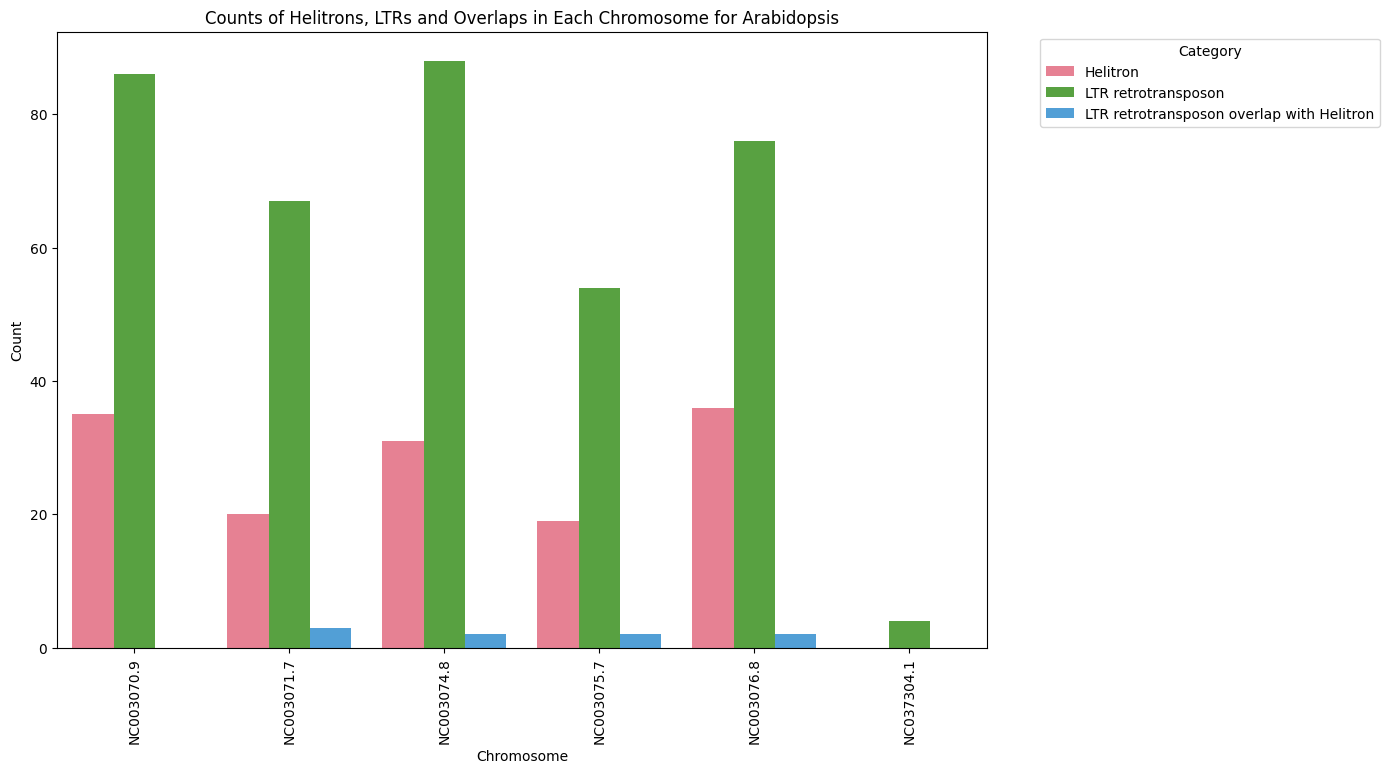

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the data with a custom function
def read_te_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        # Split by whitespace
        split_line = line.strip().split(maxsplit=3)
        if len(split_line) == 4:
            data.append(split_line)

    # Convert to DataFrame
    df = pd.DataFrame(data[1:], columns=['Chromosome', 'Start', 'End', 'Annotation'])

    # Convert Start and End to integers
    df['Start'] = df['Start'].astype(int)
    df['End'] = df['End'].astype(int)

    return df

# Read the file
file_path = '/content/arabidopsis_te_filtered.txt'
df = read_te_file(file_path)

# Step 2: Categorize annotations
def categorize_annotation(annotation):
    if 'overlap' in annotation:
        return 'LTR retrotransposon overlap with Helitron'
    elif 'Helitron' in annotation:
        return 'Helitron'
    else:
        return 'LTR retrotransposon'

df['Category'] = df['Annotation'].apply(categorize_annotation)

# Step 3: Prepare the Data
df['Mid_Position'] = (df['Start'] + df['End']) / 2 / 1e6  # Convert positions to megabases
chromosomes = df['Chromosome']
mid_positions = df['Mid_Position']
categories = df['Category']

# Step 4: Plot the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=mid_positions, y=chromosomes, hue=categories, palette='viridis', s=100, edgecolor="w", alpha=0.7)
plt.xlabel('Genomic Position (Mb)')
plt.ylabel('Chromosome')
plt.title('Transposable Elements by Chromosome and Position (Mb)')
plt.grid(True)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 5: Group data and count occurrences
counts = df.groupby(['Chromosome', 'Category']).size().reset_index(name='Count')

# Step 6: Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=counts, x='Chromosome', y='Count', hue='Category', palette='husl')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('Counts of Helitrons, LTRs and Overlaps in Each Chromosome for Arabidopsis')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()
